<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [45]:
movies = pd.read_csv('./datasets/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [46]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [47]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [48]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [49]:
# Answer:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

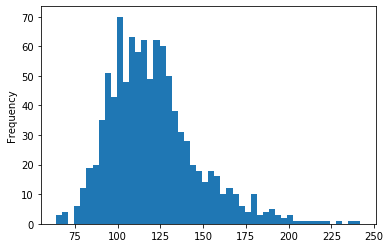

In [50]:
# Answer:
movies['duration'].plot(kind='hist',bins=50);

#### Use a box plot to display that same data.

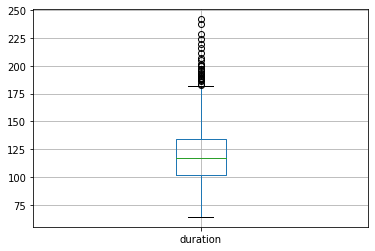

In [51]:
# Answer:
movies.boxplot(column='duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [52]:
# Answer:
movies.groupby('content_rating')['title'].count()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

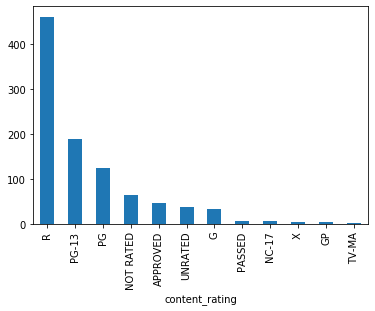

In [53]:
# Answer:
movies.groupby('content_rating')['title'].count().sort_values(ascending=False).plot(kind='bar',x='content_rating',y='title');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [54]:
# Answer:
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'],'UNRATED',inplace=True)
movies.loc[movies.content_rating.isin(['NOT RATED', 'APPROVED', 'PASSED', 'GP'])]

,star_rating,title,content_rating,genre,duration,actors_list


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [55]:
# Answer:
movies.content_rating.replace(['X', 'TV-MA'],'NC-17',inplace=True)
movies.loc[movies.content_rating.isin(['X', 'TV-MA'])]

,star_rating,title,content_rating,genre,duration,actors_list


#### Count the number of missing values in each column.

In [56]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [57]:
# Answer:

movies.content_rating.fillna('PG',inplace=True)
movies.loc[movies.content_rating.isna()]
movies.iloc[936:937,:].content_rating = 'G'
movies.iloc[936:937,:]

C:\Users\michael.amenta\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,star_rating,title,content_rating,genre,duration,actors_list
936,7.4,True Grit,G,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [58]:
# Answer:

long_movies = movies.loc[movies.duration >= 120]
short_movies = movies.loc[movies.duration < 120]
print('long movie avg rating = ' + str(long_movies.star_rating.mean()))
print('short movie avg rating = ' + str(short_movies.star_rating.mean()))

long movie avg rating = 7.948898678414082
short movie avg rating = 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

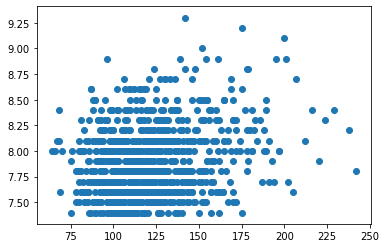

In [59]:
# Answer:
plt.scatter(movies.duration,movies.star_rating);

In [60]:
movies[['duration','star_rating']].corr()

,duration,star_rating
duration,1.000000,0.227149
star_rating,0.227149,1.000000


#### Calculate the average duration for each genre.

In [61]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

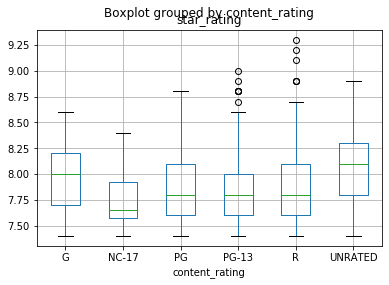

In [62]:
# Answer:
movies.boxplot(column='star_rating',by='content_rating');

#### Determine the top rated movie (by star rating) for each genre.

In [63]:
# Answer:
movies.groupby('genre')['star_rating','title'].max().sort_values('star_rating',ascending=False)

,star_rating,title
genre,,
Crime,9.3,Zodiac
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Biography,8.9,Walk the Line
Drama,8.9,Zulu
Western,8.9,Unforgiven
Animation,8.6,Wreck-It Ralph
Comedy,8.6,Zombieland
Horror,8.6,[Rec]


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [64]:
movies.title.value_counts()

The Girl with the Dragon Tattoo    2
Les Miserables                     2
Dracula                            2
True Grit                          2
Amores Perros                      1
Glory                              1
Rudy                               1
Pi                                 1
The Matrix                         1
Green Street Hooligans             1
The Kite Runner                    1
Shadow of a Doubt                  1
About Time                         1
The Usual Suspects                 1
Rebecca                            1
Secrets & Lies                     1
Ratatouille                        1
Unforgiven                         1
Forrest Gump                       1
This Is England                    1
Total Recall                       1
X-Men: First Class                 1
Everything Is Illuminated          1
In the Heat of the Night           1
Doubt                              1
In the Mood for Love               1
Jagten                             1
C

In [65]:
movies[movies.title.isin(['The Girl with the Dragon Tattoo','Les Miserables','Dracula','True Grit'])].sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,G,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [66]:
# Answer:
movies_count = movies.genre.value_counts()

In [67]:
movies_ten = movies_count[movies_count >= 10].index.tolist()

In [68]:
movies_ten

['Drama',
 'Comedy',
 'Action',
 'Crime',
 'Biography',
 'Adventure',
 'Animation',
 'Horror',
 'Mystery']

In [69]:
movies[movies.genre.isin(movies_ten)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [32]:
# Answer:
movies_avg = movies.groupby('genre')['star_rating'].mean()

In [70]:
movies_avg[movies_avg.index.isin(movies.genre.value_counts()[movies.genre.value_counts() >= 10].index)]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [41]:
# Answer:
movies_stats = movies.groupby('genre')['star_rating'].agg(['mean','count'])
movies_stats


,mean,count
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Family,7.850000,2
Fantasy,7.700000,1


In [42]:
result = movies_stats[movies_stats.count >= 10]
result

TypeError: '>=' not supported between instances of 'method' and 'int'

In [43]:
result = movies_stats[movies_stats['count'] >= 10]
result

,mean,count
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Horror,7.806897,29
Mystery,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!

In [145]:
movies['actors_list'] = movies['actors_list'].map(lambda x: x.lstrip("'u").rstrip("'"))
movies['actors_list']

0      [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1        [u'Marlon Brando', u'Al Pacino', u'James Caan']
2      [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3      [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4      [u'John Travolta', u'Uma Thurman', u'Samuel L....
5      [u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...
6      [u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...
7      [u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...
8      [u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...
9      [u'Brad Pitt', u'Edward Norton', u'Helena Bonh...
10     [u'Elijah Wood', u'Ian McKellen', u'Orlando Bl...
11     [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...
12     [u'Mark Hamill', u'Harrison Ford', u'Carrie Fi...
13       [u'Tom Hanks', u'Robin Wright', u'Gary Sinise']
14     [u'Elijah Wood', u'Ian McKellen', u'Viggo Mort...
15     [u'Matthew McConaughey', u'Anne Hathaway', u'J...
16     [u'Jack Nicholson', u'Louise Fletcher', u'Mich...
17     [u'Toshir\xf4 Mifune', u